In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
dtv = lambda α, β: sum(abs(α - β)) / 2

In [133]:
rcParams.update({'font.size': 22})

# Questão 3

In [303]:
def genRing(n):
    return array([[(i-1) % n, (i+1) % n] for i in range(n)])

def genComplete(n):
    return array([array(range(n))[arange(n) != i] for i in range(n)])

def genTree(levels):
    n = 2**levels - 1
    def genEdges(i):
        aux = array([floor((i-1)/2), 2*i+1, 2*i+2], dtype=int)
        return aux[(aux >= 0) & (aux < n)]
    return array([genEdges(i) for i in range(n)])  

def genGrid(a, b):
    def genEdges(i, j):
        n = lambda k, l: k * b + l
        aux = []
        if i > 0:
            aux.append(n(i-1, j))
        if j > 0:
            aux.append(n(i, j-1))
        if i < a-1:
            aux.append(n(i+1, j))
        if j < b-1:
            aux.append(n(i, j+1))
        return aux
    return array([genEdges(i, j) for i in range(a) for j in range(b)])

In [305]:
def πTree(Adj):
    return array([len(i) for i in Adj]) / (2 * (len(Adj) - 1))

def πGrid(Adj, a, b):
    return array([len(i) for i in Adj]) / (2 * a * b - a - b) / 2

In [309]:
def adj2matrix(Adj):
    n = len(Adj)
    M = zeros((n, n))
    for v, edges in enumerate(Adj):
        for u in edges:
            M[v, u] = 1
    return M

In [396]:
Adjs = {
    'Anel': genRing(100),
    'Árvore': genTree(7),
    'Grid 10x10': genGrid(10, 10),
    'Grid 100x1': genGrid(100, 1),
    'Completo': genComplete(100),
}

graphs = {i: adj2matrix(Adjs[i]) for i in Adjs}

ts = 100000
πₜ = {i: zeros((ts, len(graphs[i]))) for i in graphs}

for i in graphs:
    graphs[i] += diag(graphs[i].sum(1))
    graphs[i] = (graphs[i].T / graphs[i].sum(1)).T
    
    # eu optei por fazer a multiplicação de matriz direta
    # pois precisamos de todos os πₜ e desta maneira
    # temos menos erro numérico e melhor desempenho
    πₜ[i][0] = graphs[i][0]
    for j in range(1, ts):
         πₜ[i][j] = πₜ[i][j-1] @ graphs[i]

    # codigo fazendo por decomposição espectral
#     l, Q = eig(graphs[i])
#     Qᵢ = inv(Q)
#     for j in range(ts):
#         πₜ[i][j] = (Q @ diag(l ** j) @ Qᵢ)[0]

In [397]:
realπ = {
    'Anel': 1/100,
    'Árvore': πTree(Adjs["Árvore"]),
    'Grid 10x10': πGrid(Adjs["Grid 10x10"], 10, 10),
    'Grid 100x1': πGrid(Adjs["Grid 100x1"], 100, 1),
    'Completo': 1/100,
}

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


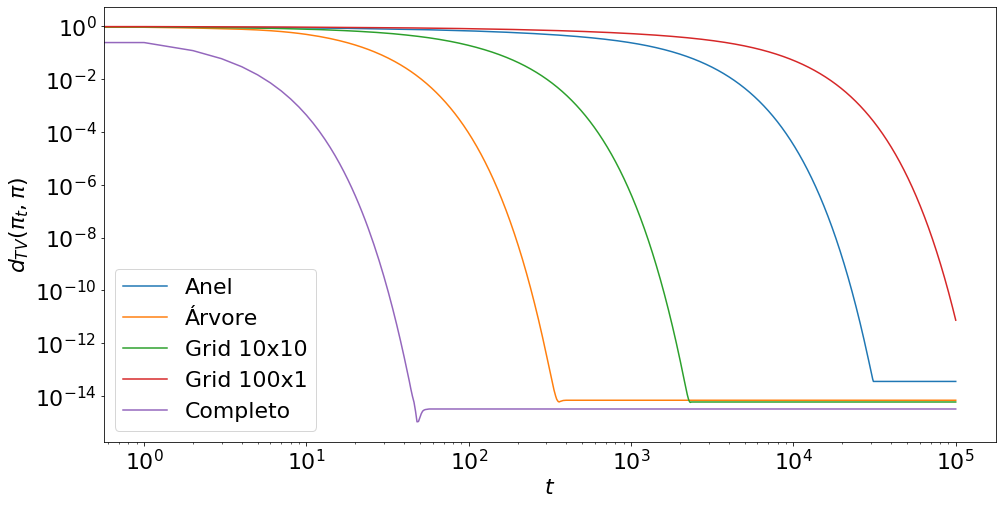

In [398]:
figure(figsize=(16,8))

xlabel('$t$')
ylabel('$d_{TV}(\pi_t, \pi)$')

for i in graphs:
    loglog([dtv(j, realπ[i]) for j in πₜ[i]], label=i)

legend();

In [ ]:
def lazyStep(Adj, i, p):
    if rand() < p:
        return i
    return Adj[i][int(rand() * len(Adj[i]))]

def lazyWalk(Adj, iₒ, p, n):
    state = [iₒ]
    for i in range(n):
        state.append(lazyStep(Adj, state[-1], p))
    return array(state)

In [ ]:
def group(samples, n):
    return array([sum(samples == i) for i in range(n)])

def cumGroup(samples, n):
    output = zeros((len(samples) + 1, n))
    for i in range(len(samples)):
        output[i, samples[i]] += 1
        output[i+1, :] = output[i, :]
    return (output.T / output.sum(axis=1)).T[:-1]